In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
%%bash
mkdir -p /scratch/shaunak/
rsync -aPsq ada:/share1/shaunak/leps_2_mod /scratch/shaunak/

In [3]:
!ls -lat /scratch/shaunak/leps_2_mod/T_1

total 1176
drwxr-xr-x 7 shaunak research   4096 May 12 16:44 ..
drwxr-xr-x 2 shaunak research   4096 May 12 15:32 .
-rw-r--r-- 1 shaunak research    104 May 12 15:32 end.rst
-rw-r--r-- 1 shaunak research 188234 May 12 15:32 p.txt
-rw-r--r-- 1 shaunak research 800115 May 12 15:32 scalars.txt
-rw-r--r-- 1 shaunak research 197021 May 12 15:32 v.txt


In [4]:
from LEPS import LEPS_II_Mod as L_II_Mod
V_LEPS_II = L_II_Mod().V

In [7]:
rAB_II, x = np.meshgrid(np.arange(0.2, 4.1, 0.05), np.arange(-2, 5, 0.05))
l = rAB_II.flatten().shape[0]
LEPS_II = np.zeros(l)
for i in np.arange(l):
    LEPS_II[i] = V_LEPS_II(rAB_II.flatten()[i], x.flatten()[i])
LEPS_II = LEPS_II.reshape(rAB_II.shape)

In [8]:
def plot_graph(offset = False):
    fig = plt.figure(figsize = (8, 8))

    ax = fig.add_subplot(1, 1, 1)
    addition = 0
    if offset:
        addition = 40000
    C = plt.contourf(rAB_II, x, LEPS_II, cmap="Blues_r", levels = np.linspace(-4.6, 10, 30) + addition)
    plt.colorbar()
    ax.contour(rAB_II, x, LEPS_II, colors='white', levels = np.linspace(-4.6, 10, 20) + addition, alpha = 0.3, linewidths = 2)
    ax.set_xlabel('$r_\mathrm{AB}$', fontsize = 16)
    ax.set_ylabel('$x$', fontsize = 16)
    ax.set_title("LEPS_II", fontsize = 20)
    _ = ax.set_xlim(0.3, 3.4)

In [83]:
file_loc = '/scratch/shaunak/leps_2_mod/T_1'
pos = np.loadtxt(os.path.join(file_loc, 'p.txt'))

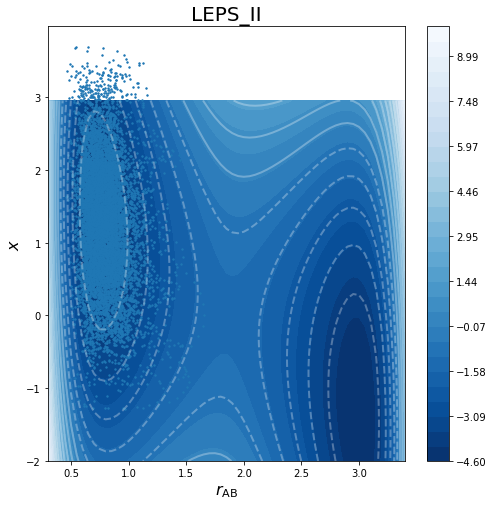

In [84]:
plot_graph()
plt.scatter(pos[:, 1], pos[:, 2], s = 2)

### Computing expected probability distribution

In [13]:
rAB_II, x = np.meshgrid(np.arange(0.2, 3.5, 0.05), np.arange(-2, 3, 0.05))
l = rAB_II.flatten().shape[0]
LEPS_II = np.zeros(l)
for i in np.arange(l):
    LEPS_II[i] = V_LEPS_II(rAB_II.flatten()[i], x.flatten()[i])
LEPS_II = LEPS_II.reshape(rAB_II.shape)

In [14]:
from LEPS import Z_LEPS, Free_energy

In [19]:
T = 0.3
Z = Z_LEPS(1, T)
f = Free_energy(1, T)
kB = 1
beta = 1 / (kB * T)


In [20]:
exp = np.exp(-beta * LEPS_II) / Z

In [21]:
levels = np.array([0, 0.05, 0.1, 0.2, 0.3, 1.5, 2])

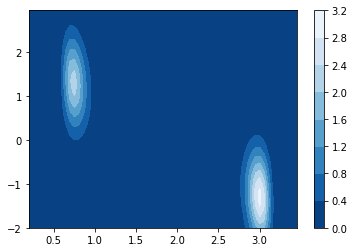

In [22]:
# plt.contourf(rAB_II, x, exp, levels = np.linspace(0, 0.3, 10))
plt.contourf(rAB_II, x, exp, cmap = "Blues_r")
# plt.contourf(rAB_II, x, LEPS_II)
plt.colorbar()

In [85]:
xedges = np.linspace(rAB_II[0, 0], rAB_II[0, -1], 20)
yedges = np.linspace(x[0, 0], x[-1, 0], 20)
H, xedges, yedges = np.histogram2d(pos[:, 1], pos[:, 2], bins = (xedges, yedges), density = True)
# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.
H = H.T

In [86]:
x_a, y_a = np.meshgrid((xedges[1:] + xedges[:-1]) / 2, (yedges[1:] + yedges[:-1]) / 2)

In [87]:
x

array([[-2.  , -2.  , -2.  , ..., -2.  , -2.  , -2.  ],
       [-1.95, -1.95, -1.95, ..., -1.95, -1.95, -1.95],
       [-1.9 , -1.9 , -1.9 , ..., -1.9 , -1.9 , -1.9 ],
       ...,
       [ 2.85,  2.85,  2.85, ...,  2.85,  2.85,  2.85],
       [ 2.9 ,  2.9 ,  2.9 , ...,  2.9 ,  2.9 ,  2.9 ],
       [ 2.95,  2.95,  2.95, ...,  2.95,  2.95,  2.95]])

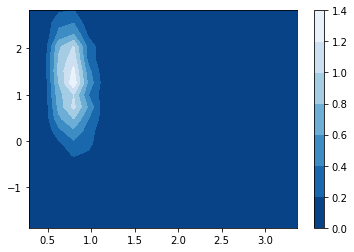

In [91]:
plt.contourf(x_a, y_a, H, cmap = "Blues_r")
plt.colorbar()